# synpuf disclosure risk

Compare synthetic PUFs trained from a 50% sample, both to the training set and the remaining 50% holdout. Synthetic file (1) is from synthimpute random forests; (2) is from the synthpop R package.

## Setup

### Imports

In [1]:
import pandas as pd
import numpy as np
import synthimpute as si
from scipy import stats

import matplotlib as mpl
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.ticker import ScalarFormatter

**UPDATE!**

In [2]:
# ID from filename (synpufx.csv and nearestx.csv), and name for plots.
ID1 = 12
NAME1 = 'synthpop'

ID2 = 13
NAME2 = 'Don synthpop'

ID3 = 11
NAME3 = 'RF 20 trees, seed on E00100 & E09600'

ID4 = 9
NAME4 = 'RF 20 trees'

ID5 = 10
NAME5 = 'RF 50 trees'

ID6 = 14
NAME6 = 'RF 100 trees'


PUF_SAMPLE_DIR = '~/Downloads/puf/'
SYN_DIR = '~/Downloads/syntheses/'
NEAREST_DIR = '~/Downloads/nearest/'

### Graphing

In [3]:
# !wget https://github.com/MaxGhenis/random/raw/master/Roboto-Regular.ttf -P /usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf
# mpl.font_manager._rebuild()

In [4]:
sns.set_style('white')
DPI = 200
mpl.rc('savefig', dpi=DPI)
mpl.rcParams['figure.dpi'] = DPI
mpl.rcParams['figure.figsize'] = 6.4, 4.8  # Default.
mpl.rcParams['font.sans-serif'] = 'Roboto'
mpl.rcParams['font.family'] = 'sans-serif'

# Set title text color to dark gray (https://material.io/color) not black.
TITLE_COLOR = '#212121'
mpl.rcParams['text.color'] = TITLE_COLOR

# Axis titles and tick marks are medium gray.
AXIS_COLOR = '#757575'
mpl.rcParams['axes.labelcolor'] = AXIS_COLOR
mpl.rcParams['xtick.color'] = AXIS_COLOR
mpl.rcParams['ytick.color'] = AXIS_COLOR

### Load data

In [5]:
nearest1 = pd.read_csv(NEAREST_DIR + 'nearest' + str(ID1) + '.csv')
nearest2 = pd.read_csv(NEAREST_DIR + 'nearest' + str(ID2) + '.csv')
nearest3 = pd.read_csv(NEAREST_DIR + 'nearest' + str(ID3) + '.csv')
nearest4 = pd.read_csv(NEAREST_DIR + 'nearest' + str(ID4) + '.csv')
nearest5 = pd.read_csv(NEAREST_DIR + 'nearest' + str(ID5) + '.csv')
nearest6 = pd.read_csv(NEAREST_DIR + 'nearest' + str(ID6) + '.csv')

## Charts

In [6]:
distances_stacked = pd.DataFrame({
    'type': 'train',
    'model': NAME1,
    'dist': nearest1.train_dist
}).append(pd.DataFrame({
    'type': 'test',
    'model': NAME1,
    'dist': nearest1.test_dist
})).append(pd.DataFrame({
    'type': 'train',
    'model': NAME2,
    'dist': nearest2.train_dist
})).append(pd.DataFrame({
    'type': 'test',
    'model': NAME2,
    'dist': nearest2.test_dist
    })).append(pd.DataFrame({
    'type': 'train',
    'model': NAME3,
    'dist': nearest3.train_dist
})).append(pd.DataFrame({
    'type': 'test',
    'model': NAME3,
    'dist': nearest3.test_dist
})).append(pd.DataFrame({
    'type': 'train',
    'model': NAME4,
    'dist': nearest4.train_dist
})).append(pd.DataFrame({
    'type': 'test',
    'model': NAME4,
    'dist': nearest4.test_dist
})).append(pd.DataFrame({
    'type': 'train',
    'model': NAME5,
    'dist': nearest5.train_dist
})).append(pd.DataFrame({
    'type': 'test',
    'model': NAME5,
    'dist': nearest5.test_dist
})).append(pd.DataFrame({
    'type': 'train',
    'model': NAME6,
    'dist': nearest6.train_dist
})).append(pd.DataFrame({
    'type': 'test',
    'model': NAME6,
    'dist': nearest6.test_dist
}))

In [7]:
median_distance = distances_stacked.pivot_table(aggfunc=np.median, 
                                                columns='type', index='model').dist
median_distance['train_test_ratio'] = median_distance.train / median_distance.test
median_distance.loc[[NAME1, NAME2, NAME3, NAME4, NAME5]]

type,test,train,train_test_ratio
model,,,
synthpop,0.402443,0.390299,0.969826
Don synthpop,0.259709,0.242814,0.934949
"RF 20 trees, seed on E00100 & E09600",0.294962,0.234298,0.794335
RF 20 trees,0.520004,0.464502,0.893266
RF 50 trees,0.818037,0.679038,0.830083


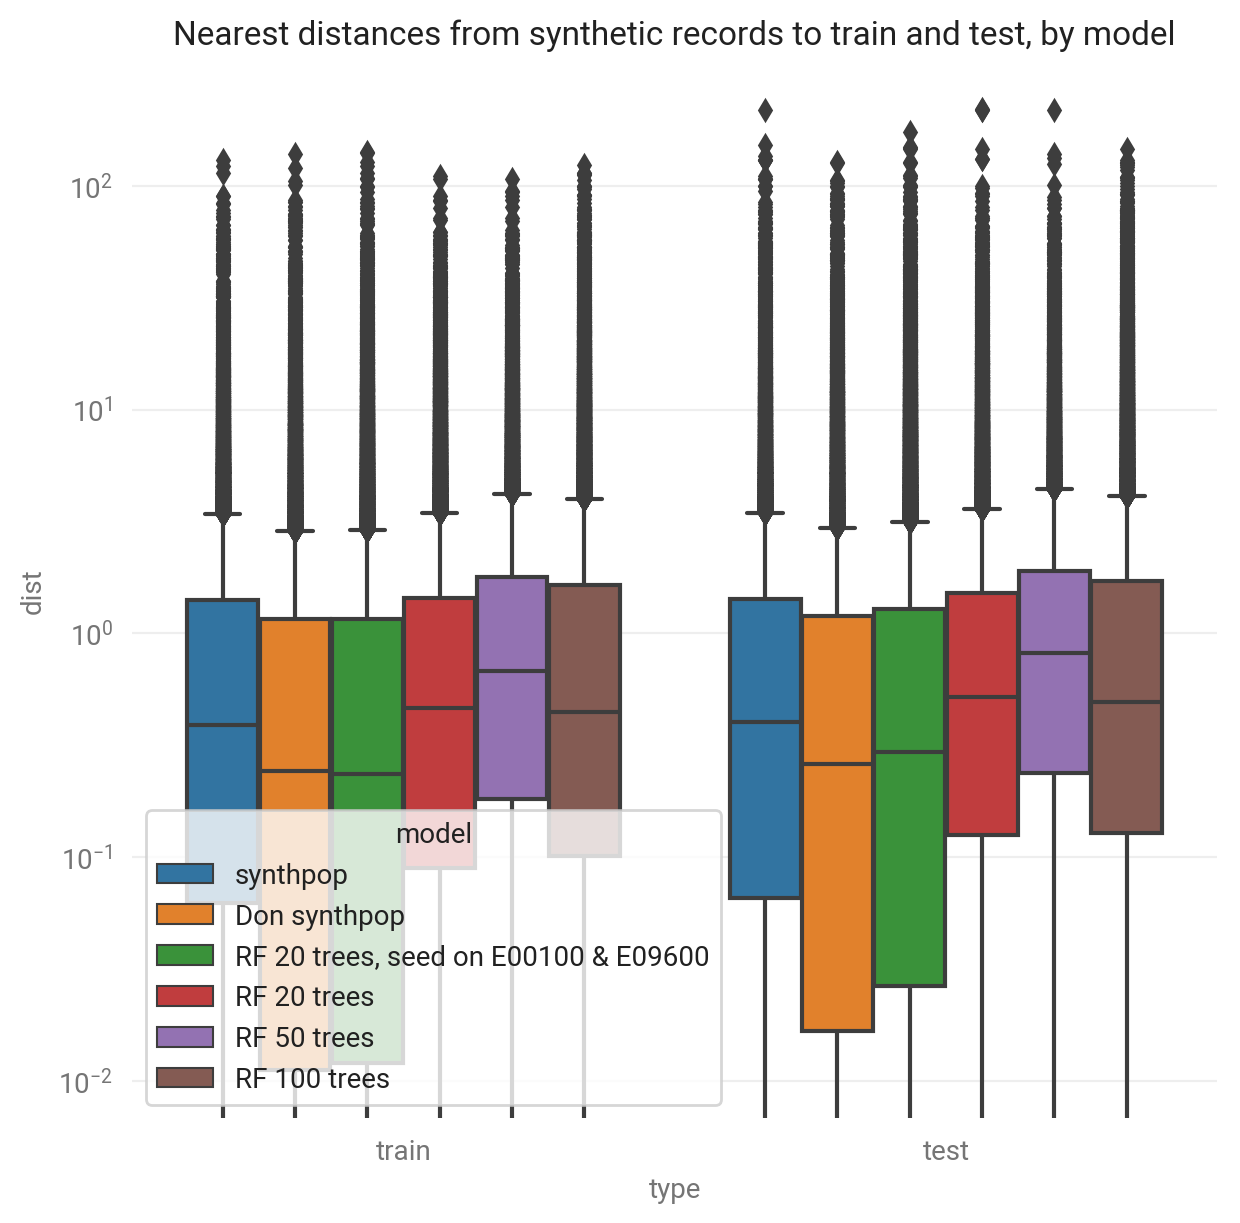

In [8]:
f, ax = plt.subplots(figsize=(7, 7))
ax.set(yscale='log')
sns.boxplot(x='type', y='dist',
            hue='model', data=distances_stacked)
sns.despine(left=True, bottom=True)
ax.yaxis.grid(color='#eeeeee')
plt.title('Nearest distances from synthetic records to train and test, by model')
plt.show()

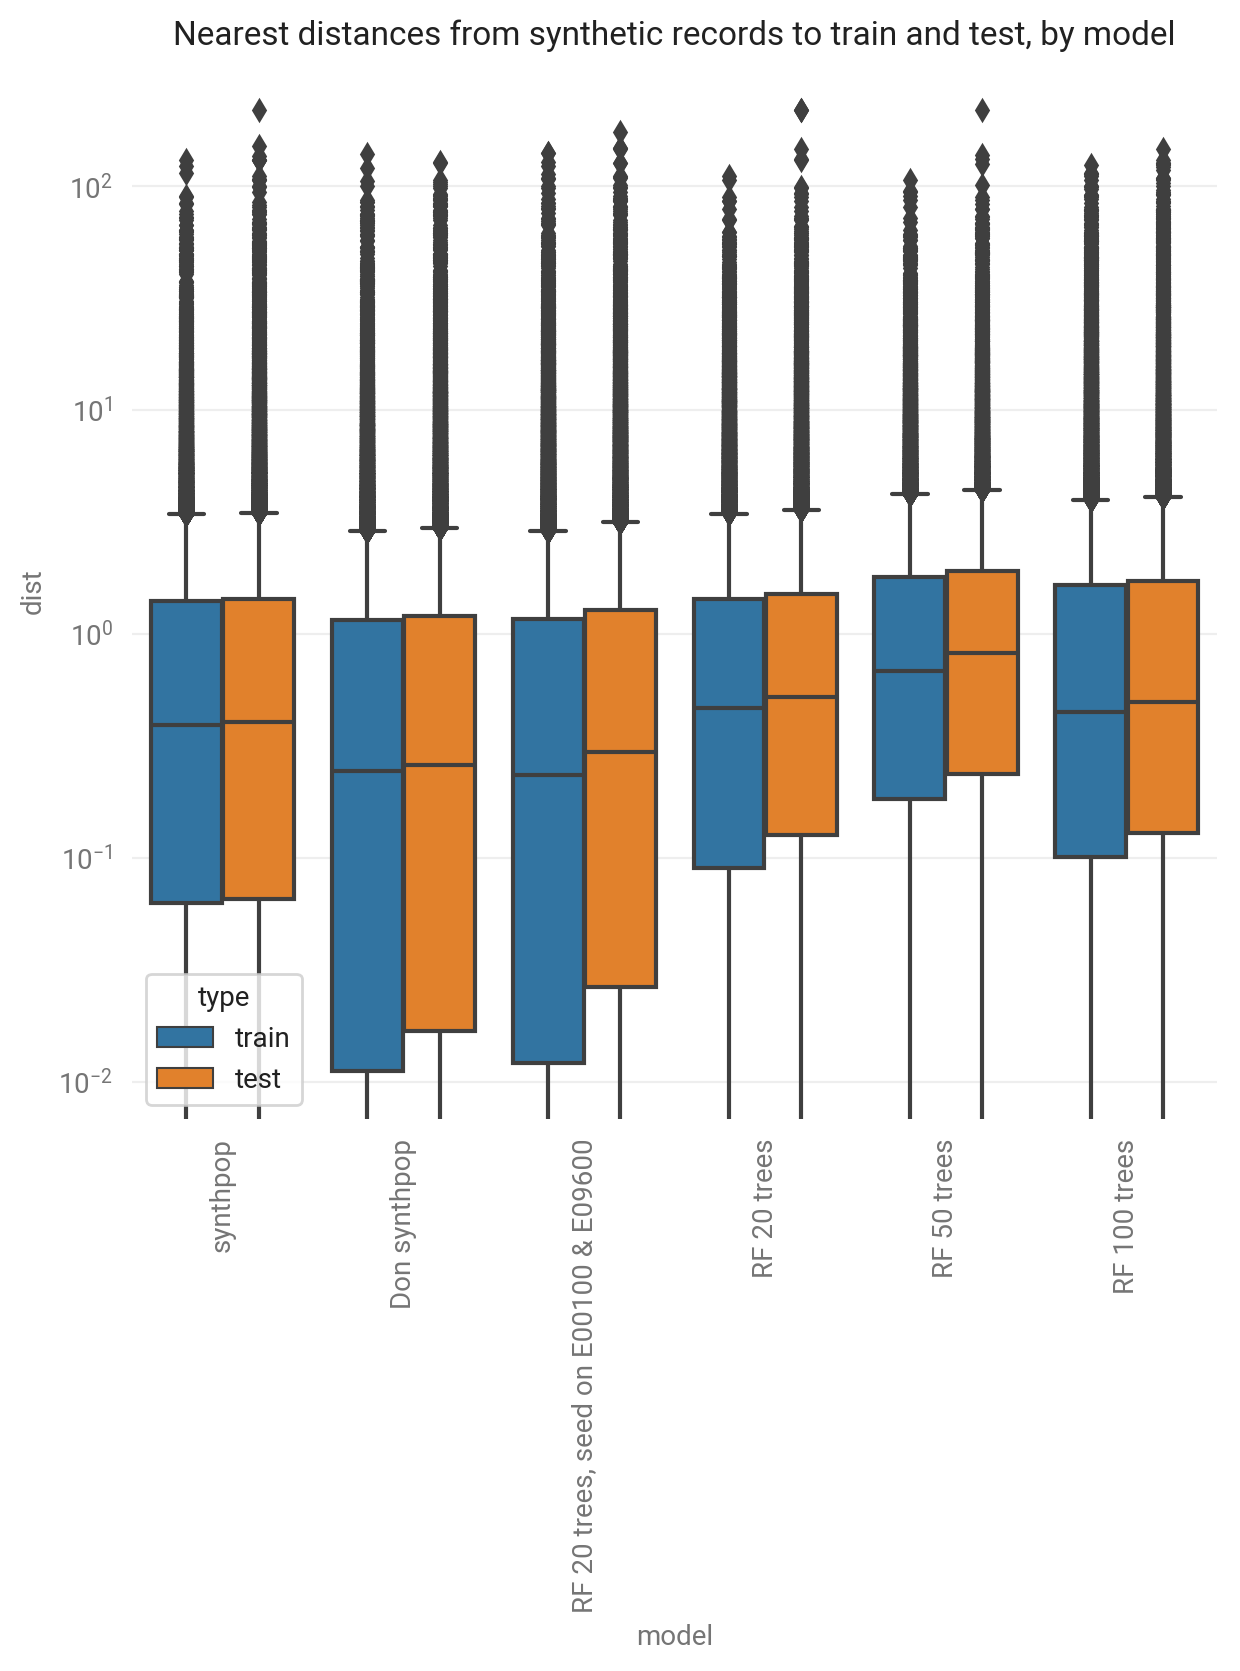

In [9]:
f, ax = plt.subplots(figsize=(7, 7))
ax.set(yscale='log')
sns.boxplot(x='model', y='dist',
            hue='type', data=distances_stacked)
sns.despine(left=True, bottom=True)
ax.yaxis.grid(color='#eeeeee')
plt.xticks(rotation=90)
plt.title('Nearest distances from synthetic records to train and test, by model')
plt.show()

### CDFs of distances

### Exact matches

In [10]:
exact_matches = pd.DataFrame({
    'type': ['train', 'train', 'train', 'train', 'train', 'train',
             'test', 'test', 'test', 'test', 'test', 'test'],
    'model': [NAME1, NAME2, NAME3, NAME4, NAME5, NAME6,
              NAME1, NAME2, NAME3, NAME4, NAME5, NAME6],
    'share_exact': [(nearest1.train_dist == 0).mean(),
                    (nearest2.train_dist == 0).mean(),
                    (nearest3.train_dist == 0).mean(),
                    (nearest4.train_dist == 0).mean(),
                    (nearest5.train_dist == 0).mean(),
                    (nearest6.train_dist == 0).mean(),
                    (nearest1.test_dist == 0).mean(),
                    (nearest2.test_dist == 0).mean(),
                    (nearest3.test_dist == 0).mean(),
                    (nearest4.test_dist == 0).mean(),
                    (nearest5.test_dist == 0).mean(),
                    (nearest6.train_dist == 0).mean()]})
exact_matches.pivot_table(index='model', columns='type')

share_exact          
type                                        test     train
model                                                     
Don synthpop                            0.070726  0.082144
RF 100 trees                            0.002064  0.002064
RF 20 trees                             0.000049  0.000696
RF 20 trees, seed on E00100 & E09600    0.036499  0.098421
RF 50 trees                             0.000024  0.000769
synthpop                                0.005287  0.006130

In [11]:
exact_matches_bool = pd.DataFrame({
    'type': 'train',
    'model': NAME1,
    'share_exact': (nearest1.train_dist == 0)
}).append(pd.DataFrame({
    'type': 'test',
    'model': NAME1,
    'share_exact': (nearest1.test_dist == 0)
})).append(pd.DataFrame({
    'type': 'train',
    'model': NAME2,
    'share_exact': (nearest2.train_dist == 0)
})).append(pd.DataFrame({
    'type': 'test',
    'model': NAME2,
    'share_exact': (nearest2.test_dist == 0)
})).append(pd.DataFrame({
    'type': 'train',
    'model': NAME3,
    'share_exact': (nearest3.train_dist == 0)
})).append(pd.DataFrame({
    'type': 'test',
    'model': NAME3,
    'share_exact': (nearest3.test_dist == 0)
})).append(pd.DataFrame({
    'type': 'train',
    'model': NAME4,
    'share_exact': (nearest4.train_dist == 0)
})).append(pd.DataFrame({
    'type': 'test',
    'model': NAME4,
    'share_exact': (nearest4.test_dist == 0)
})).append(pd.DataFrame({
    'type': 'train',
    'model': NAME5,
    'share_exact': (nearest5.train_dist == 0)
})).append(pd.DataFrame({
    'type': 'test',
    'model': NAME5,
    'share_exact': (nearest5.test_dist == 0)
})).append(pd.DataFrame({
    'type': 'train',
    'model': NAME6,
    'share_exact': (nearest6.train_dist == 0)
})).append(pd.DataFrame({
    'type': 'test',
    'model': NAME6,
    'share_exact': (nearest6.test_dist == 0)
}))

/home/maxghenis/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


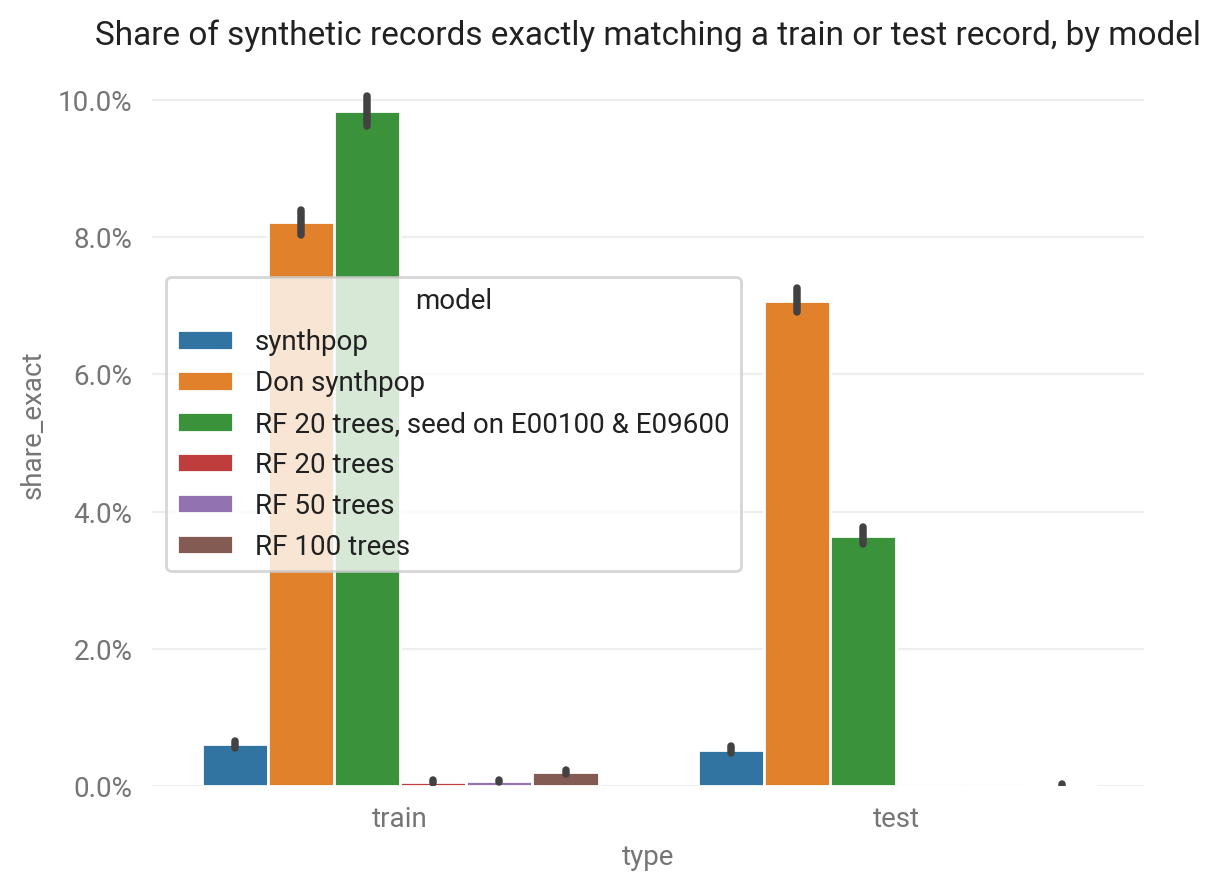

In [12]:
ax = sns.barplot(x='type', y='share_exact', hue='model', data=exact_matches_bool)
sns.despine(left=True, bottom=True)
ax.yaxis.grid(color='#eeeeee')
ax.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(
    lambda y, _: '{:.1%}'.format(y)))
plt.title('Share of synthetic records exactly matching a train or test record, by model')
plt.show()

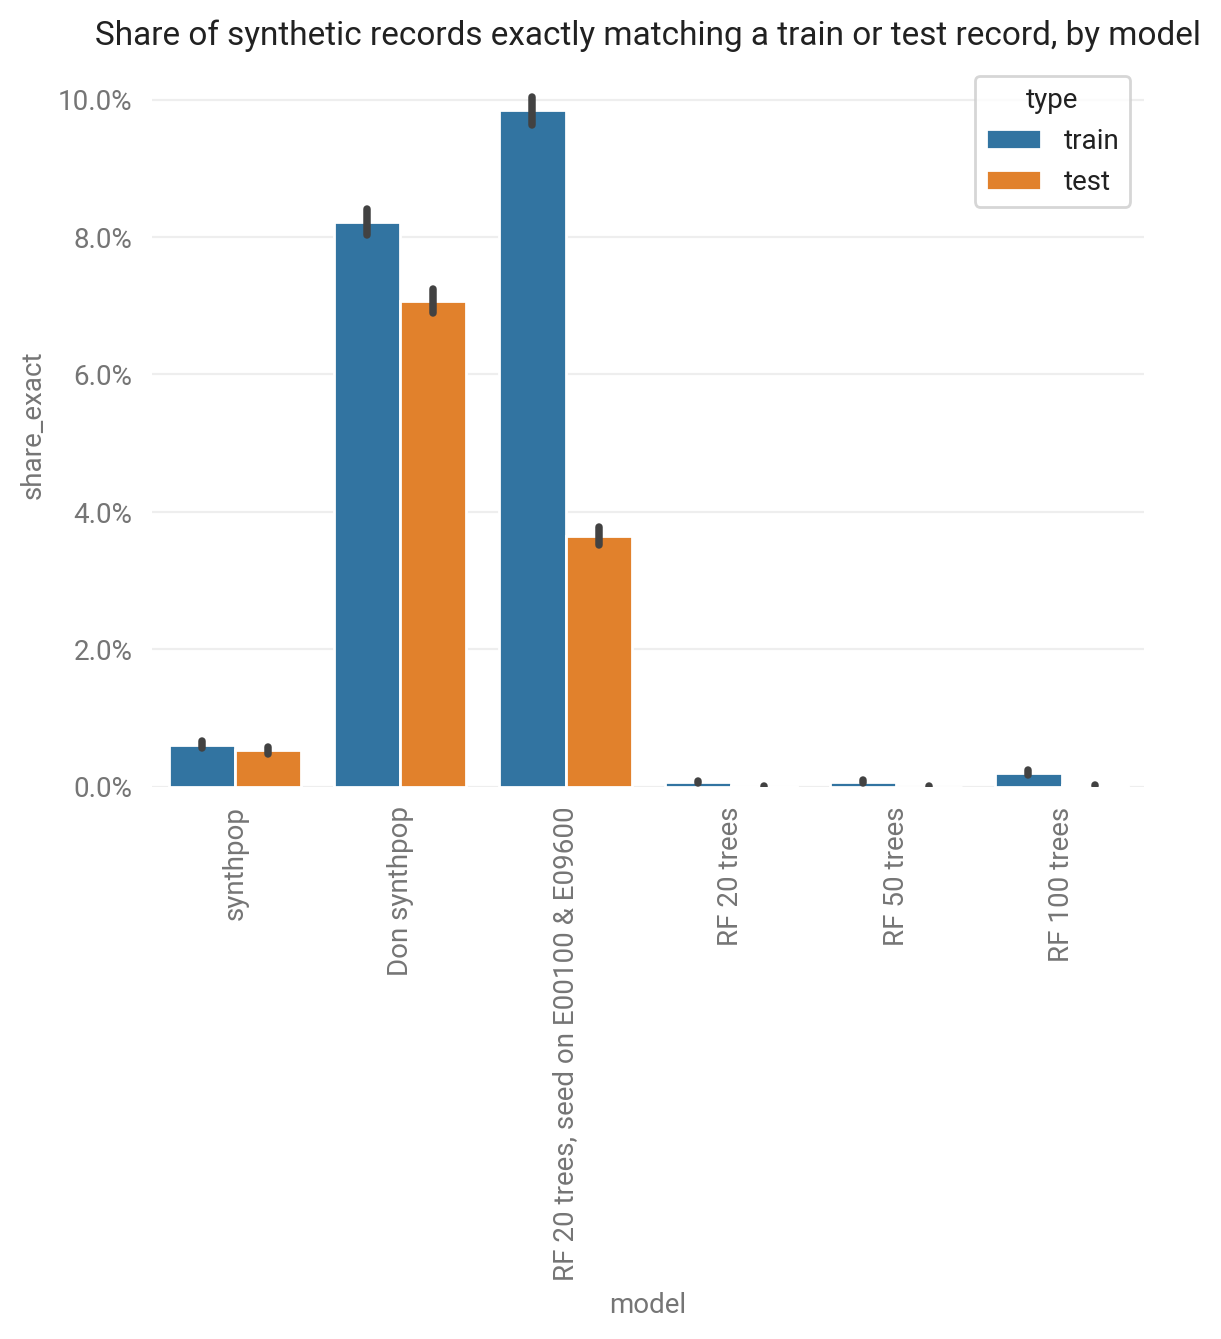

In [13]:
ax = sns.barplot(x='model', y='share_exact', hue='type', data=exact_matches_bool)
sns.despine(left=True, bottom=True)
ax.yaxis.grid(color='#eeeeee')
ax.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(
    lambda y, _: '{:.1%}'.format(y)))
plt.xticks(rotation=90)
plt.title('Share of synthetic records exactly matching a train or test record, by model')
plt.show()